<a href="https://colab.research.google.com/github/artur01-code/mlbookcamp-code/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!wget wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-19 14:57:12--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2022-09-19 14:57:12--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.04s   

2022-09-19 14:57:12 (33.2 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]

FINISHED --2022-09-19 14:57:12--
Total wall clock time: 0.4s
Downloaded: 1 files, 1.4M in 0.04s (33.2 MB/s)


In [ ]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
#df.dtypes
df.dtypes[df.dtypes == 'float64'].index

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')



#Question 1
Find a feature with missing values. How many missing values does it have?



In [ ]:
df.isna().sum()[df.isna().sum() > 0]


total_bedrooms    207
dtype: int64

#Question 2
What's the median (50% percentile) for variable 'population'?

In [ ]:
df['population'].median()

1166.0

Shuffle the initial dataset, use seed 42.



In [ ]:
df_split = df.sample(frac=1, random_state=42)


Split your data in train/val/test sets, with 60%/20%/20% distribution.


In [ ]:
train, val, test = np.split(df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))])

Make sure that the target value ('median_house_value') is not in your dataframe.

In [ ]:
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))])

Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [ ]:
np.log1p(df['median_house_value'])

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

#Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

# with 0

In [ ]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

In [ ]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [ ]:
y_pred = w_0 + X_train.dot(w)


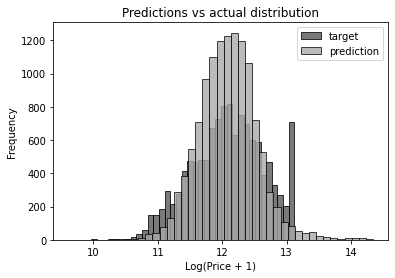

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

0.3413135910156676

In [ ]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [ ]:
rmse(y_val, y_pred)


0.32953303652279736

# with mean

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(df_train['total_bedrooms'].mean())
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [ ]:
y_pred = w_0 + X_train.dot(w)


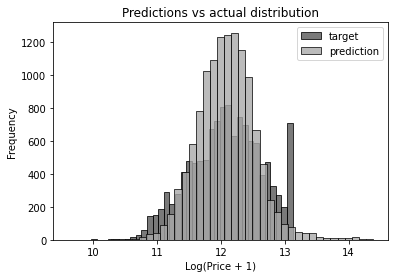

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

0.3410416181032806

In [ ]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [ ]:
rmse(y_val, y_pred)


0.32901954390060323

# with median

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
def prepare_X(df, filler):
    df_num = df[base]
    df_num = df_num.fillna(filler)
    X = df_num.values
    return X

In [ ]:
X_train = prepare_X(df_train, df_train['total_bedrooms'].median())
w_0, w = train_linear_regression(X_train, y_train)

In [ ]:
y_pred = w_0 + X_train.dot(w)


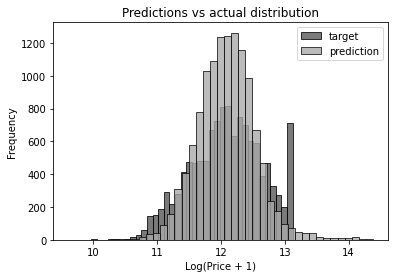

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [ ]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred)

0.3410609087581673

In [ ]:
X_val = prepare_X(df_val, df_train['total_bedrooms'].median())
y_pred = w_0 + X_val.dot(w)

In [ ]:
rmse(y_val, y_pred)


0.3290501842142924

# Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

* 0
* 0.000001
* 0.001
* 0.0001

In [ ]:
def prepare_X(df, filler):
    df_num = df[base]
    df_num = df_num.fillna(filler)
    X = df_num.values
    return X

In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
X_train = prepare_X(df_train, 0)


In [ ]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    print('train\t', round(rmse(y_train, y_pred), 2))

    X_val = prepare_X(df_val, 0)
    y_pred = w_0 + X_val.dot(w)
    print('val\t', round(rmse(y_val, y_pred), 2))
    print('----------------------')

train	 0.34
val	 0.33
----------------------
train	 0.34
val	 0.33
----------------------
train	 0.34
val	 0.33
----------------------
train	 0.34
val	 0.33
----------------------
train	 0.34
val	 0.33
----------------------
train	 0.34
val	 0.33
----------------------
train	 0.35
val	 0.33
----------------------
train	 0.35
val	 0.34
----------------------
train	 0.35
val	 0.34
----------------------


# Question 5
* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))


```
* Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.*
```



Options:

* 0.16
* 0.00005
* 0.005
* 0.15555


In [ ]:
a = np.empty(10)
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  np.random.seed(seed)

  n = len(df)

  n_val = int(0.2 * n)
  n_test = int(0.2 * n)
  n_train = n - (n_val + n_test)

  idx = np.arange(n)
  np.random.shuffle(idx)

  df_shuffled = df.iloc[idx]

  df_train = df_shuffled.iloc[:n_train].copy()
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
  df_test = df_shuffled.iloc[n_train+n_val:].copy()

  y_train_orig = df_train.median_house_value.values
  y_val_orig = df_val.median_house_value.values
  y_test_orig = df_test.median_house_value.values

  y_train = np.log1p(df_train.median_house_value.values)
  y_val = np.log1p(df_val.median_house_value.values)
  y_test = np.log1p(df_test.median_house_value.values)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']
  X_train = prepare_X(df_train, 0)
  w_0, w = train_linear_regression(X_train, y_train)
  y_pred = w_0 + X_train.dot(w)
  rmse(y_train, y_pred)
  X_val = prepare_X(df_val, 0)
  y_pred = w_0 + X_val.dot(w)
  print("rmse(y_val, y_pred):", rmse(y_val, y_pred))
  #np.append(a, rmse(y_val, y_pred))
  a[seed] = rmse(y_val, y_pred)

round(np.std(a), 3)

rmse(y_val, y_pred): 0.3388430480530326
rmse(y_val, y_pred): 0.33623872559566276
rmse(y_val, y_pred): 0.3320912318833194
rmse(y_val, y_pred): 0.34051536090377893
rmse(y_val, y_pred): 0.33890240665742954
rmse(y_val, y_pred): 0.34348667257187443
rmse(y_val, y_pred): 0.34519809530991635
rmse(y_val, y_pred): 0.3395989927407549
rmse(y_val, y_pred): 0.34662308731992736
rmse(y_val, y_pred): 0.3365926124190451


0.004

#Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

Options:

* 0.35
* 0.135
* 0.450
* 0.245


In [ ]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_train_val['median_house_value']
del df_test['median_house_value']


X_null_train_val = prepare_X(df_train_val, 0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, 0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.35